In [1]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

model = load_model('/Users/houssam/Downloads/my_project/model_saved.h5')

image = load_img('/Users/houssam/Downloads/car_colour/val/blue/0fbef7e38e.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted Class (0 - Cars , 1- Planes): ", label[0][0])


2024-11-13 20:44:59.171403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 200ms/step
Predicted Class (0 - Cars , 1- Planes):  0.0022964487


2024-11-13 21:53:11.629501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


FileUpload(value=(), accept='image/*', description='Upload')

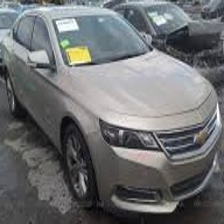

1/1 [==============================] - 0s 185ms/step
Predicted Class: Plane
Confidence Score: 0.6555


In [1]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from PIL import Image
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display

# Load the pre-trained model
model = load_model('/Users/houssam/Downloads/my_project/model_saved.h5')

# Create a file upload widget
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)

# Function to process and predict the uploaded image
def predict_uploaded_image(change):
    # Check if a file was uploaded
    if not upload.value:
        print("Please upload an image.")
        return

    # Access the uploaded file
    uploaded_file = list(upload.value.values())[0] if isinstance(upload.value, dict) else upload.value[0]
    content = uploaded_file['content'] if isinstance(uploaded_file, dict) else uploaded_file[1]
    
    # Load and display the image
    image = Image.open(BytesIO(content)).resize((224, 224))
    display(image)  # Show the image in Jupyter Notebook

    # Preprocess the image for prediction
    img_array = img_to_array(image) / 255.0  # Normalize the image
    img_array = img_array.reshape(1, 224, 224, 3)

    # Make prediction
    prediction = model.predict(img_array)
    label = "Car" if prediction[0][0] < 0.5 else "Plane"
    
    # Display the prediction and confidence
    print(f"Predicted Class: {label}")
    print(f"Confidence Score: {prediction[0][0]:.4f}")

# Attach the prediction function to the upload widget
upload.observe(predict_uploaded_image, names='value')
